In [1]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
from statsmodels.tsa.stattools import coint
import seaborn

In [2]:
#symbols = ['GLD','SPY']
symbols = ['SPY','AAPL','ADBE','LUV','MSFT','SKYW','QCOM', 'HPQ','JNPR','AMD','IBM']
start_date ='2014-01-01'
end_date = '2020-01-01'
df = pdr.DataReader(symbols, 'yahoo', start_date,end_date)
df

Attributes   Adj Close                                                \
Symbols            SPY       AAPL        ADBE        LUV        MSFT   
Date                                                                   
2013-12-31  160.621765  17.819059   59.880001  17.749958   32.198647   
2014-01-02  159.082428  17.568451   59.290001  17.787649   31.983477   
2014-01-03  159.056351  17.182550   59.160000  18.296404   31.768301   
2014-01-06  158.595398  17.276245   58.119999  18.042027   31.096956   
2014-01-07  159.569473  17.152693   58.970001  18.400042   31.337952   
...                ...        ...         ...        ...         ...   
2019-12-24  314.311646  70.234581  329.640015  54.729366  155.014450   
2019-12-26  315.984802  71.628067  331.200012  54.689522  156.285065   
2019-12-27  315.906494  71.600876  330.790009  54.111744  156.570709   
2019-12-30  314.164856  72.025833  328.339996  53.872665  155.221313   
2019-12-31  314.928040  72.552094  329.809998  53.773045  155.329636   

Attributes                                                         ...  \
Symbols          SKYW       QCOM        HPQ       JNPR        AMD  ...   
Date                                                               ...   
2013-12-31  13.921184  58.637890  10.216426  19.200096   3.870000  ...   
2014-01-02  13.921184  57.903431  10.099583  19.123533   3.950000  ...   
2014-01-03  14.100024  57.563843  10.347871  19.370237   4.000000  ...   
2014-01-06  13.836472  57.413788  10.329615  19.242632   4.130000  ...   
2014-01-07  13.751758  57.840237  10.289453  19.276663   4.180000  ...   
...               ...        ...        ...        ...        ...  ...   
2019-12-24  64.694420  85.705994  19.599451  23.078768  46.540001  ...   
2019-12-26  64.763931  85.348770  19.694641  23.268791  46.630001  ...   
2019-12-27  64.426300  85.734978  19.542337  23.192780  46.180000  ...   
2019-12-30  64.207443  85.377739  19.504261  23.278294  45.520000  ...   
2019-12-31  64.296974  85.184639  19.561375  23.401810  45.860001  ...   

Attributes       Volume                                              \
Symbols            AAPL       ADBE        LUV        MSFT      SKYW   
Date                                                                  
2013-12-31  223084400.0  1391300.0  2872100.0  17503500.0  233100.0   
2014-01-02  234684800.0  2745900.0  4556500.0  30632200.0  295500.0   
2014-01-03  392467600.0  1589000.0  8708100.0  31134800.0  323800.0   
2014-01-06  412610800.0  3753600.0  8125400.0  43603700.0  328800.0   
2014-01-07  317209200.0  2963600.0  7228000.0  35802800.0  319000.0   
...                 ...        ...        ...         ...       ...   
2019-12-24   48478800.0  1066400.0  1326400.0   8989200.0   70400.0   
2019-12-26   93121200.0  1055100.0  1930800.0  14520600.0  141800.0   
2019-12-27  146266000.0  1229800.0  3348200.0  18412800.0  157700.0   
2019-12-30  144114400.0  1896700.0  2696300.0  16348400.0  157400.0   
2019-12-31  100805600.0  1592300.0  2881100.0  18369400.0  266400.0   

Attributes                                                             
Symbols           QCOM         HPQ        JNPR         AMD        IBM  
Date                                                                   
2013-12-31   5725100.0  21935003.0   3299500.0  12347800.0  3619700.0  
2014-01-02  10110200.0  28688096.0   5653500.0  20548400.0  4546500.0  
2014-01-03   7970400.0  27911011.0   4879800.0  22887200.0  4063200.0  
2014-01-06   7696200.0  22550682.0   8412800.0  42398300.0  4067800.0  
2014-01-07   5902700.0  31535723.0  10464500.0  42932100.0  5932300.0  
...                ...         ...         ...         ...        ...  
2019-12-24   2435200.0   3064900.0    714900.0  44432200.0  1202100.0  
2019-12-26   5070000.0   3729700.0   1141000.0  57562800.0  2129700.0  
2019-12-27   5808900.0   4780500.0   3030300.0  36581300.0  2752200.0  
2019-12-30   6543100.0   4458000.0   2176300.0  41149700.0  4118900.0  
2019-12-31   5173400.0 

In [16]:
def find_cointegrated_pairs(data):
    n = data.shape[1] # set n as the number of columns in the data frame
    #Create a p-value matrix based on cointergartion test
    #Cointegration is a statistical property of two or more time-series variables which indicates if a linear combination of the variables is stationary.
    pvalue_matrix = np.ones((n, n)) #Create matrix tp store p-values across the stocks
    keys = data.keys() #create index for column keys
    pairs = [] #create an empty list
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]]) #test cointegration between the stocks
            pvalue_matrix[i, j] = result[1] #store the p-values on the matrix
        if result[1] < 0.02:
            pairs.append((keys[i], keys[j])) # append all the pairs which to the pairs list which are stationary
            #null hypothesis is that they are stationary, less than p-value means null hypothesis is regected
    return pvalue_matrix, pairs

In [17]:
pvalues, pairs= find_cointegrated_pairs(df['Adj Close'])
pvalues, pairs

(array([[1.        , 0.51390077, 0.07658421, 0.91445986, 0.34116032,
         0.14720598, 0.7105082 , 0.88520721, 0.93968701, 0.49875185,
         0.98667012],
        [1.        , 1.        , 0.62786841, 0.98653615, 0.37522794,
         0.94683421, 0.83050764, 0.98639948, 0.98547401, 0.18545397,
         0.99377376],
        [1.        , 1.        , 1.        , 0.94222902, 0.50457123,
         0.34421969, 0.83771111, 0.88570113, 0.92125738, 0.71146401,
         0.99262226],
        [1.        , 1.        , 1.        , 1.        , 0.37709313,
         0.12809258, 0.32535483, 0.16038854, 0.14644686, 0.38411195,
         0.38018916],
        [1.        , 1.        , 1.        , 1.        , 1.        ,
         0.88078635, 0.82979761, 0.97052857, 0.97572355, 0.12807082,
         1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 0.81692294, 0.48357195, 0.66835902, 0.80955547,
         0.97669884],
        [1.        , 1.        , 1.     

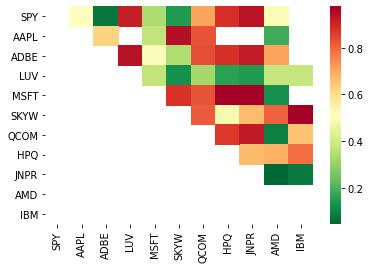

In [23]:
seaborn.heatmap(pvalues, xticklabels=symbols,yticklabels=symbols, cmap='RdYlGn_r', mask = (pvalues >= 0.98))

In [25]:
Symbol1_prices = df['Adj Close']['JNPR']
Symbol2_prices = df['Adj Close']['AMD']
score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)
pvalue

0.04700885551852054

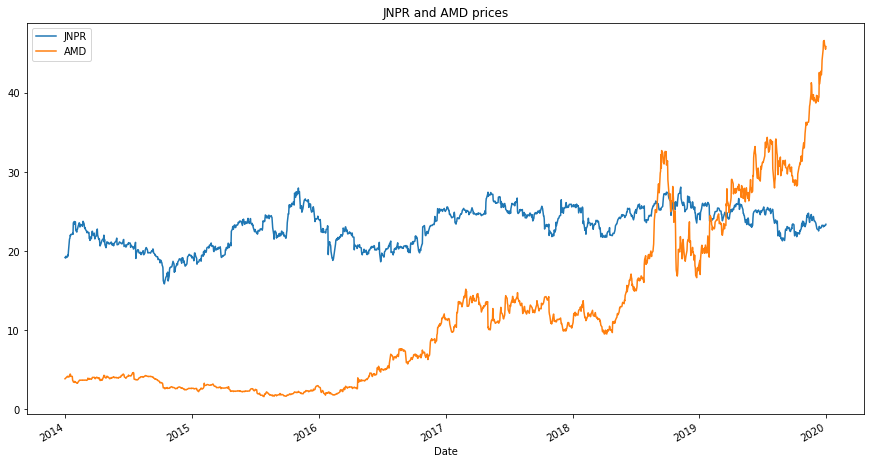

In [27]:
plt.title("JNPR and AMD prices")
Symbol1_prices.plot(figsize = (15,8))
Symbol2_prices.plot()
plt.legend()
plt.show()

Date
2013-12-31    0.194381
2014-01-02    0.160748
2014-01-03    0.161073
2014-01-06    0.109633
2014-01-07    0.096280
                ...   
2019-12-24   -1.058567
2019-12-26   -1.057692
2019-12-27   -1.056789
2019-12-30   -1.054219
2019-12-31   -1.054527
Length: 1511, dtype: float64

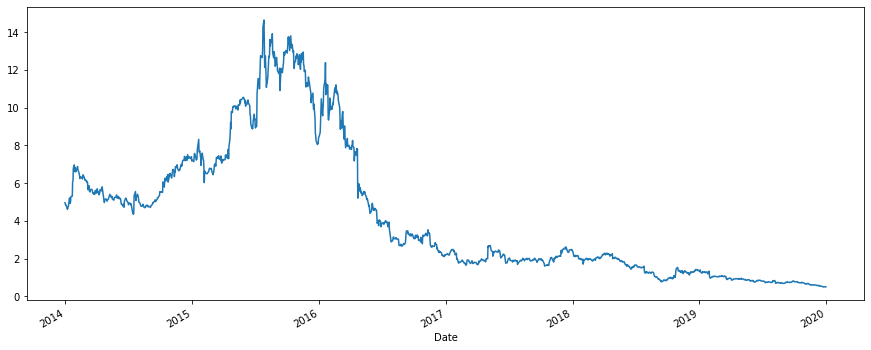

In [34]:
def zscore(series):
    return (series - series.mean()) / np.std(series)
ratios = Symbol1_prices / Symbol2_prices
ratios.plot(figsize = (15,6))
zscore(ratios) #higher ratio, higher zscore.

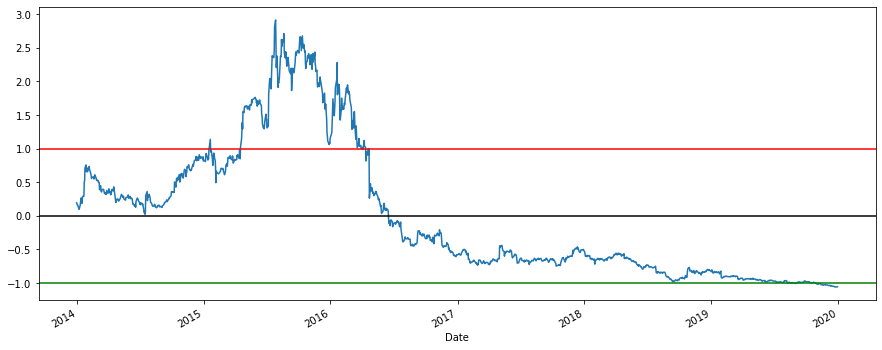

In [35]:
zscore(ratios).plot(figsize =(15,6))
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="green")
plt.show()

#=1 and 1 are set as trading signals
#short symbol 1 "JNPR" and long symbol 2 "AMD" when zscore less than -1
#long symbol 1 "AMD" and short symbol 2 "JNPR" when zscore greater than 1

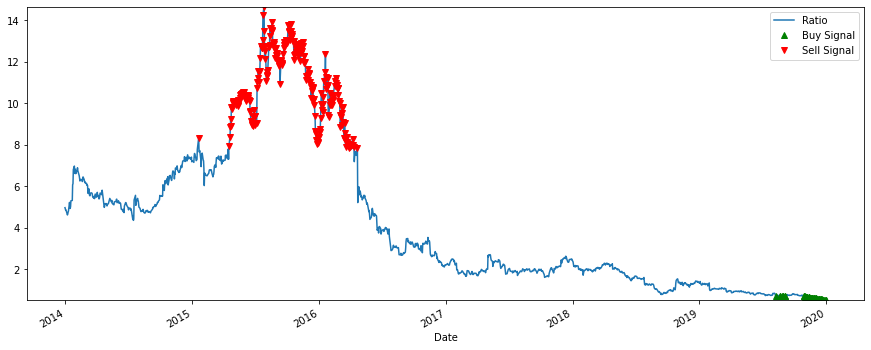

In [43]:
ratios.plot(figsize = (15,6))
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="v")
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.show()

(735123.45, 737533.55, 1.0, 50.0)

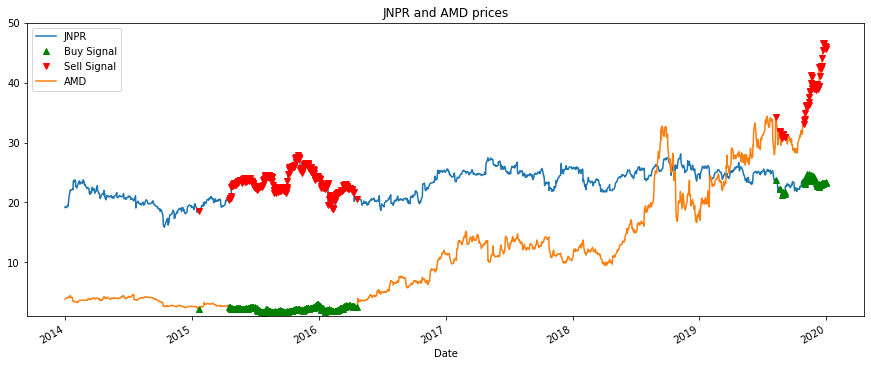

In [77]:
symbol1_buy=Symbol1_prices.copy()
symbol1_sell=Symbol1_prices.copy()
symbol2_buy=Symbol2_prices.copy()
symbol2_sell=Symbol2_prices.copy()

plt.title("JNPR and AMD prices")
Symbol1_prices.plot(figsize = (15,6))
symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
symbol1_buy.plot(color="g", linestyle="None", marker="^")
symbol1_sell.plot(color="r", linestyle="None", marker="v")

Symbol2_prices.plot()
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
symbol2_buy.plot(color="g", linestyle="None", marker="^")
symbol2_sell.plot(color="r", linestyle="None", marker="v")

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,1,50))
plt.legend(["JNPR", "Buy Signal", "Sell Signal","AMD"])

axes = plt.gca()
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,1,50))

In [51]:
pair_correlation_trading_strategy = pd.DataFrame(index=Symbol1_prices.index)
pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy

,symbol1_price,symbol1_buy,symbol1_sell,symbol2_buy,symbol2_sell
Date,,,,,
2013-12-31,19.200096,0.0,0.0,0.0,0.0
2014-01-02,19.123533,0.0,0.0,0.0,0.0
2014-01-03,19.370237,0.0,0.0,0.0,0.0
2014-01-06,19.242632,0.0,0.0,0.0,0.0
2014-01-07,19.276663,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-24,23.078768,0.0,0.0,0.0,0.0
2019-12-26,23.268791,0.0,0.0,0.0,0.0
2019-12-27,23.192780,0.0,0.0,0.0,0.0


In [84]:
position

0

In [83]:
if not position:
    print("true")

true


In [63]:
position=0
for i in range(len(Symbol1_prices)):
    s1price=Symbol1_prices[i]
    s2price=Symbol2_prices[i]
    if not position and symbol1_buy[i]!=0: #if not positoin means if position is False(0), symbol1_buy[i] is from above
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = 0
        


0

In [90]:
pair_correlation_trading_strategy[250:300]

,symbol1_price,symbol1_buy,symbol1_sell,symbol2_buy,symbol2_sell,symbol1_position,symbol2_position
Date,,,,,,,
2014-12-29,19.387527,0.000000,0.00000,0.00,0.00,0.000000,0.00
2014-12-30,19.456190,0.000000,0.00000,0.00,0.00,0.000000,0.00
2014-12-31,19.155802,0.000000,0.00000,0.00,0.00,0.000000,0.00
2015-01-02,19.267370,0.000000,0.00000,0.00,0.00,0.000000,0.00
2015-01-05,19.052814,0.000000,0.00000,0.00,0.00,0.000000,0.00
2015-01-06,18.786764,0.000000,0.00000,0.00,0.00,0.000000,0.00
2015-01-07,19.207294,0.000000,0.00000,0.00,0.00,0.000000,0.00
2015-01-08,19.765148,0.000000,0.00000,0.00,0.00,0.000000,0.00
2015-01-09,19.782316,0.000000,0.00000,0.00,0.00,0.000000,0.00


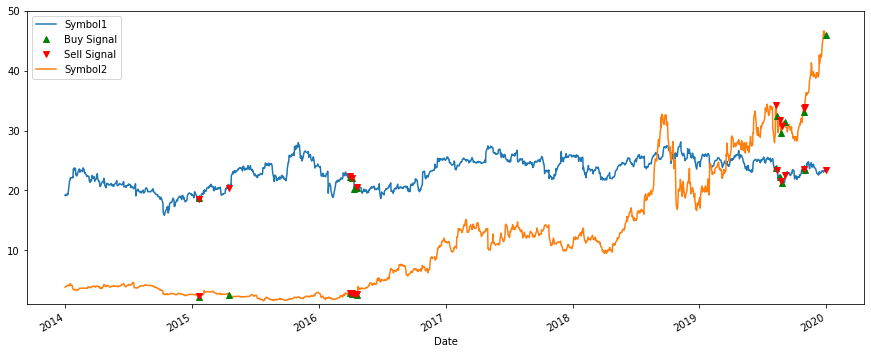

In [76]:
Symbol1_prices.plot()
pair_correlation_trading_strategy['symbol1_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol1_sell'].plot(color="r", linestyle="None", marker="v")

Symbol2_prices.plot(figsize = (15,6))
pair_correlation_trading_strategy['symbol2_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol2_sell'].plot(color="r", linestyle="None", marker="v")



x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,1,50))
plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
plt.show()

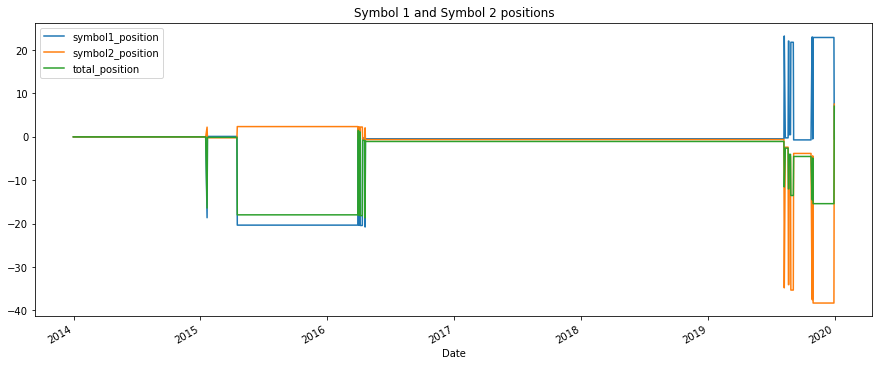

In [93]:
pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot()
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot()

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize = (15,6))
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()

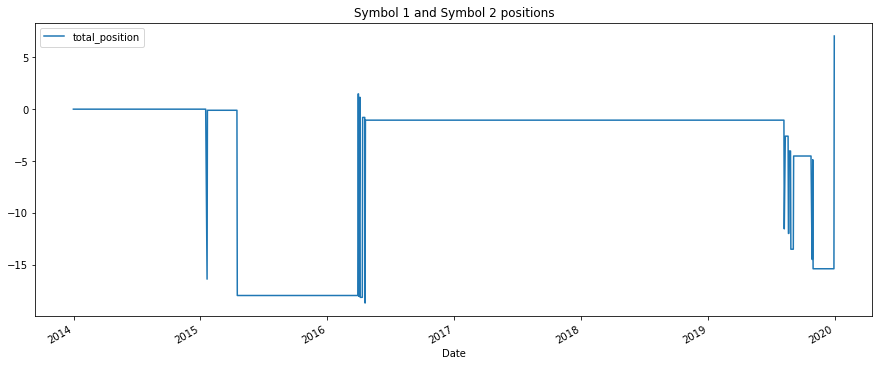

In [94]:
pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize = (15,6))
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()

In [107]:
pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['delta']=np.zeros(len(Symbol1_prices))

pair_correlation_trading_strategy

,symbol1_price,symbol1_buy,symbol1_sell,symbol2_buy,symbol2_sell,symbol1_position,symbol2_position,total_position,delta
Date,,,,,,,,,
2013-12-31,19.200096,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
2014-01-02,19.123533,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
2014-01-03,19.370237,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
2014-01-06,19.242632,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
2014-01-07,19.276663,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
2019-12-24,23.078768,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
2019-12-26,23.268791,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
2019-12-27,23.192780,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0


In [119]:
position=0
s1_shares = 10000

for i in range(len(Symbol1_prices)):
    s1positions= Symbol1_prices[i] * s1_shares
    s2positions= Symbol2_prices[i] * int(s1positions/Symbol2_prices[i])
    #print(Symbol1_prices[i],Symbol2_prices[i])
    delta_position=s1positions-s2positions
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] =s2positions
        pair_correlation_trading_strategy['delta'][i]=delta_position
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        pair_correlation_trading_strategy['delta'][i] = delta_position
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2positions
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        position = 0

pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
        
pair_correlation_trading_strategy[250:300]

,symbol1_price,symbol1_buy,symbol1_sell,symbol2_buy,symbol2_sell,symbol1_position,symbol2_position,total_position,delta
Date,,,,,,,,,
2014-12-29,19.387527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-12-30,19.456190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-12-31,19.155802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-02,19.267370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,19.052814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-06,18.786764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-07,19.207294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-08,19.765148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-09,19.782316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


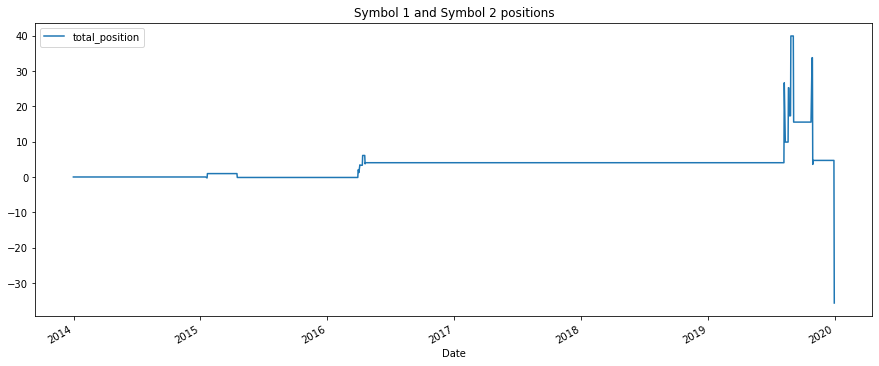

In [124]:
#pair_correlation_trading_strategy['symbol1_position'].cumsum().plot(figsize = (15,6))
#pair_correlation_trading_strategy['symbol2_position'].cumsum().plot()
pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize=(15,6))
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()


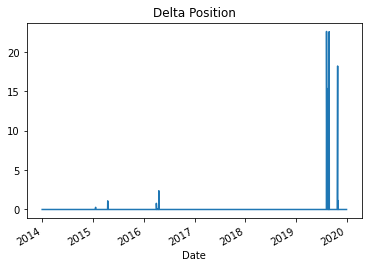

In [125]:
pair_correlation_trading_strategy['delta'].plot()
plt.title("Delta Position")
plt.show()